# Lab 3: Evaluating & Tracing Your Rag Pattern in Azure AI Foundry

## Overview 📋
In **Week 3**, we will focus on **connecting** your AI solution to **AI Foundry**, **evaluating** its performance through low-code workflows, and **implementing traceability** to capture every interaction. By the end of this lab, you should have a strong grasp of **how well** your RAG pipeline is performing, along with **detailed logs** that help you pinpoint areas for improvement.

## Learning Objectives 🎯
1. **Set Up Connection to AI Foundry**
   - Learn how to integrate your AI solution with AI Foundry.  
   - Understand the environment prerequisites and validation steps for a successful connection.

2. **Conduct Low-Code Evaluations in AI Foundry**
   - Use the CSV dataset (e.g., `question`, `truth`, `answer`, `context`) simulating your real-world queries and responsed form your RAG system.  
   - Run batch evaluations and interpret metrics to identify strengths and weaknesses in your RAG.

3. **Implement Traceability**
   - Add logging or decorators to capture each request and response in your system.  
   - Analyze logs to correlate performance bottlenecks or misalignments with evaluation outcomes.

## 1. Set Up Connection to AI Foundry

In [1]:
import os
# Define the target directory
target_directory = r"/Users/pablosal/Desktop/azure-ai-engineer-in-five-weeks"  # change your directory to the root folder

# Check if the directory exists
if os.path.exists(target_directory):
    # Change the current working directory
    os.chdir(target_directory)
    print(f"Directory changed to {os.getcwd()}")
else:
    print(f"Directory {target_directory} does not exist.")

Directory changed to c:\Users\pablosal\Desktop\azure-ai-engineer-in-five-weeks


**Additions for Week 3 in the .env File**

**Azure AI Foundry Connection String**
To retrieve the connection string for your Azure AI Foundry resources:
1. Open the Azure AI Foundry project.
2. Locate the “Project connection string” from the project settings (see screenshot below).
3. Copy this connection string.
4. Paste it into your .env

file under the relevant variable (e.g., `AZURE_AI_FOUNDRY_CONNECTION_STRING`).

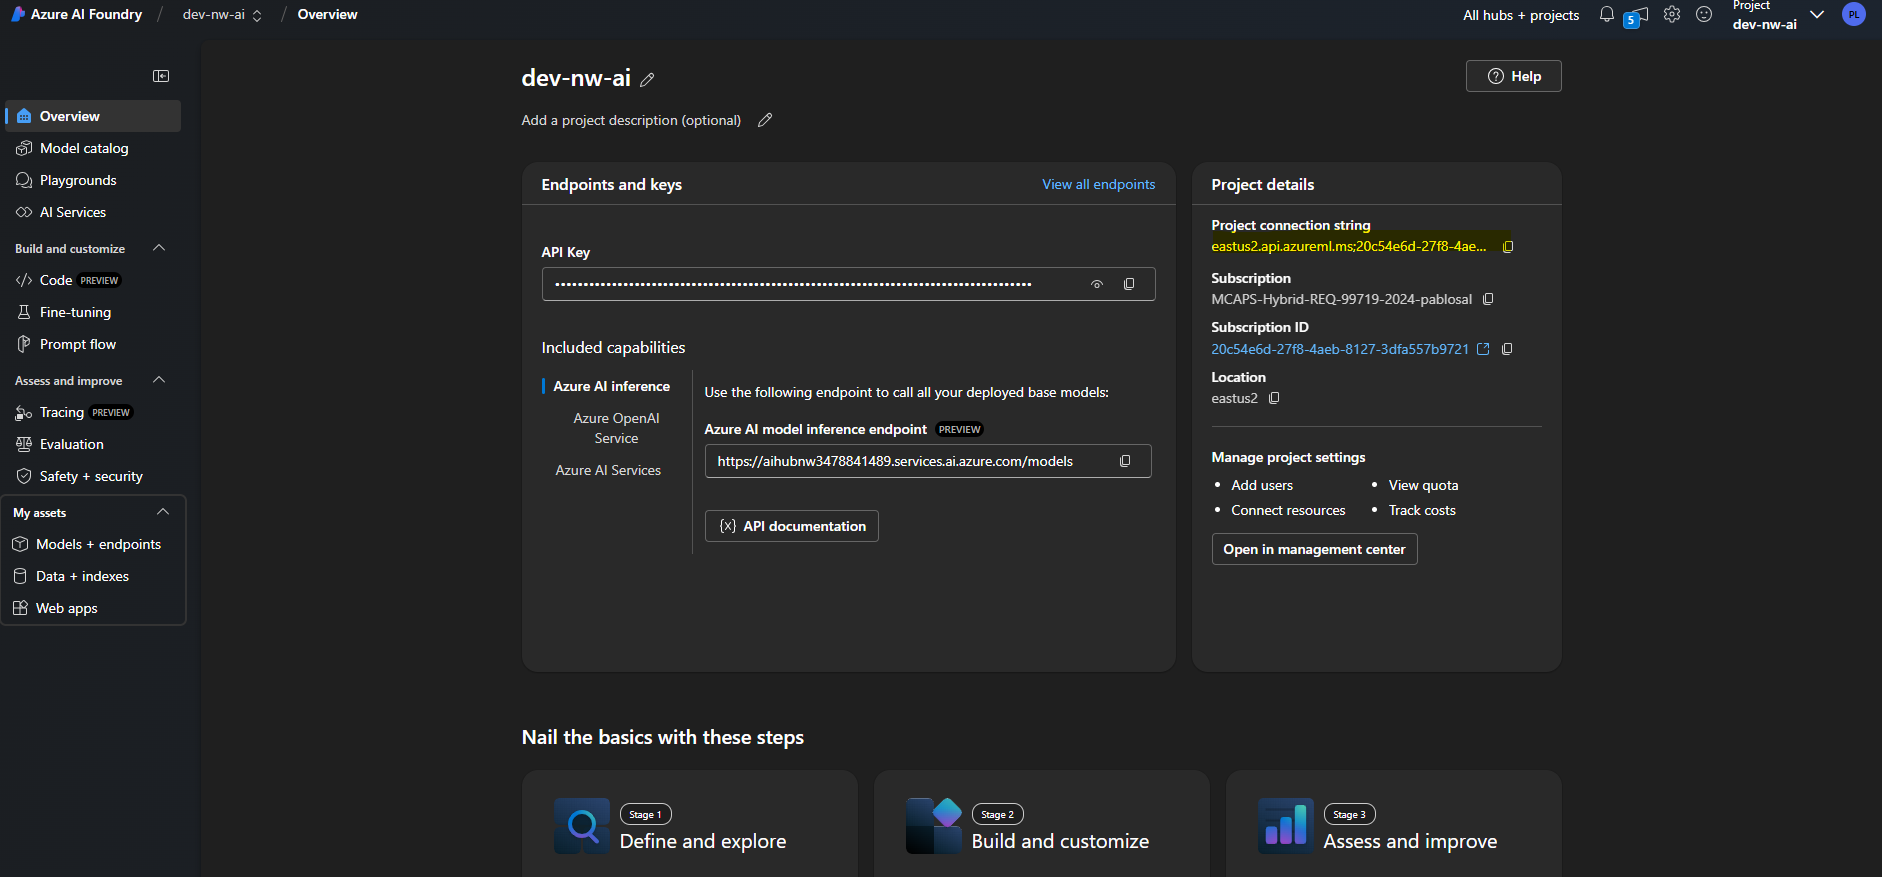

**Installing Dependencies**
```bash
!pip install azure-ai-projects azure-identity azure-ai-inference azure-ai-evaluation
```
or 

```bash
!pip install -r requirements.txt
```

In [3]:
#Make sure you have attached the correct kernel for your environment,
#then run the command below and restart the kernel:
#TODO: Remove Remote adjuction
%pip install azure-ai-projects azure-identity azure-ai-inference azure-ai-evaluation


Note: you may need to restart the kernel to use updated packages.


In [2]:
# Check if AIProjectClient can be imported
try:
    from azure.ai.projects import AIProjectClient
    print("✅ AIProjectClient is available.")
except ImportError:
    print("❌ AIProjectClient is NOT available. Please install the 'azure-ai-projects' package.")

print("\nLibrary check completed.")


✅ AIProjectClient is available.

Library check completed.


In [4]:
# Step 1: Import necessary libraries
import os
from azure.identity import DefaultAzureCredential
from azure.ai.projects import AIProjectClient

# Step 2: Set your connection string (replace with your actual connection string)
project_connection_string = os.getenv("AZURE_AI_FOUNDRY_CONNECTION_STRING")

# Step 3: Create the project client
project = AIProjectClient.from_connection_string(
    conn_str=project_connection_string,
    credential=DefaultAzureCredential()
)

# Verify connection
print("AI Foundry project client created successfully")

AI Foundry project client created successfully


## 2. Conduct Low-Code Evaluations in AI Foundry

In [5]:
from azure.ai.evaluation import GroundednessEvaluator, ViolenceEvaluator, RelevanceEvaluator

In [6]:
# connection = project.connections.get_default(connection_type=ConnectionType.AZURE_OPEN_AI, include_credentials=True)
evaluator_model = {
    "azure_endpoint": os.getenv("AZURE_OPENAI_ENDPOINT"),
    "azure_deployment": os.getenv("AZURE_OPENAI_CHAT_DEPLOYMENT_ID"),
    "api_version": os.getenv("AZURE_OPENAI_API_VERSION"),
    "api_key": os.getenv("AZURE_OPENAI_KEY"),
}

In [24]:
# Initialize Evaluators
groundedness_eval = GroundednessEvaluator(evaluator_model)
violence_eval = ViolenceEvaluator(credential=DefaultAzureCredential(), azure_ai_project=project.scope)
relevance_eval = RelevanceEvaluator(evaluator_model)

In [25]:
from azure.ai.evaluation import ContentSafetyEvaluator
ContentSafetyEvaluator?

Init signature: ContentSafetyEvaluator(credential, azure_ai_project, **kwargs)
Docstring:     
.. note::    This is an experimental class, and may change at any time. Please see https://aka.ms/azuremlexperimental for more information.


Initialize a content safety evaluator configured to evaluate content safety metrics for QA scenario.

:param credential: The credential for connecting to Azure AI project. Required
:type credential: ~azure.core.credentials.TokenCredential
:param azure_ai_project: The scope of the Azure AI project.
    It contains subscription id, resource group, and project name.
:type azure_ai_project: ~azure.ai.evaluation.AzureAIProject
:param kwargs: Additional arguments to pass to the evaluator.
:type kwargs: Any
:return: A function that evaluates content-safety metrics for "question-answering" scenario.

.. admonition:: Example:

    .. literalinclude:: ../samples/evaluation_samples_evaluate.py
        :start-after: [START content_safety_evaluator]
        :end-bef

In [26]:
import json

directory = "weeks/week-3/assets/evals/data/"
file_name = "evaluation_data.jsonl"

os.makedirs(directory, exist_ok=True)

# We will use the following content for evaluation - we are sysnetehciat reoeysy or sismsualuton the iointour an dodutosus rom OUT QA ssuten (RAG()) buusld last wekek 2
content = [
    {
        "query": "What is covered under the PerksPlus program?",
        "truth": "PerksPlus covers gym memberships, personal training sessions, yoga classes, and outdoor activities like hiking and kayaking.",
        "response": "PerksPlus offers coverage for gym memberships, yoga, and outdoor sports.",
        "context": "PerksPlus covers a wide range of fitness activities, including gym memberships, yoga classes, outdoor activities like hiking and kayaking."
    },
    {
        "query": "What health plans are available at Contoso Electronics?",
        "truth": "Contoso Electronics offers Northwind Health Plus and Northwind Standard health plans.",
        "response": "Northwind Health Plus and Northwind Standard are the two plans available.",
        "context": "Contoso Electronics offers Northwind Health Plus and Northwind Standard health plans, providing different levels of coverage."
    },
    {
        "query": "What services are included in Northwind Health Plus?",
        "truth": "Northwind Health Plus includes coverage for medical, vision, and dental services, as well as emergency care and mental health support.",
        "response": "It provides medical, vision, dental, and mental health coverage.",
        "context": "Northwind Health Plus is a comprehensive plan that covers medical, vision, and dental services, including emergency and mental health support."
    },
    {
        "query": "What is the mission of Contoso Electronics?",
        "truth": "The mission is to provide high-quality aircraft components while maintaining safety and excellence.",
        "response": "Contoso aims to deliver quality aircraft components with a focus on safety.",
        "context": "Our mission is to provide the highest quality aircraft components while maintaining a commitment to safety and excellence."
    },
    {
        "query": "What are the core values at Contoso Electronics?",
        "truth": "The core values include Quality, Integrity, Innovation, Teamwork, Respect, Excellence, Accountability, and Community.",
        "response": "Quality, Innovation, and Teamwork are some of the core values.",
        "context": "Contoso Electronics values Quality, Integrity, Innovation, Teamwork, Respect, Excellence, Accountability, and Community."
    },
]


# Save the content to the file
with open(os.path.join(directory, file_name), 'w') as file:
    for item in content:
        file.write(f"{json.dumps(item)}\n")

In [27]:
import json
import os
from datetime import datetime
from azure.ai.evaluation import evaluate
from azure.identity import DefaultAzureCredential

timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
input_file = os.path.join(directory, file_name)
output_directory = os.path.join(directory, f"runs/runid_{timestamp}")
os.makedirs(output_directory, exist_ok=True)

# Run the evaluation locally
try:
    results = evaluate(
        data=input_file,
        evaluators={
            "groundedness": groundedness_eval,
            "relevance": relevance_eval
        },
        evaluation_name="evaluate_chat_hr",
        evaluator_config={
            "default": {
                "column_mapping": {
                    "query": "${data.query}",
                    "context": "${data.context}",
                    "response": "${data.response}"
                }
            }
        },
        # azure_ai_project=project.scope,
        output_path=os.path.join(output_directory, "evaluation_results.jsonl"),
    )
    print("Evaluation completed successfully.")

except Exception as e:
    print(f"An error occurred during evaluation: {e}")

[2025-01-22 16:49:42 -0600][promptflow._core.entry_meta_generator][WARNING] - Generate meta in current process and timeout won't take effect. Please handle timeout manually outside current process.
[2025-01-22 16:49:42 -0600][promptflow._core.entry_meta_generator][WARNING] - Generate meta in current process and timeout won't take effect. Please handle timeout manually outside current process.
[2025-01-22 16:49:42 -0600][promptflow._sdk._orchestrator.run_submitter][INFO] - Submitting run azure_ai_evaluation_evaluators_common_base_eval_asyncevaluatorbase_u59y_vs_20250122_164942_417855, log path: C:\Users\pablosal\.promptflow\.runs\azure_ai_evaluation_evaluators_common_base_eval_asyncevaluatorbase_u59y_vs_20250122_164942_417855\logs.txt
[2025-01-22 16:49:42 -0600][promptflow._sdk._orchestrator.run_submitter][INFO] - Submitting run azure_ai_evaluation_evaluators_common_base_eval_asyncevaluatorbase_1uvet0eq_20250122_164942_417855, log path: C:\Users\pablosal\.promptflow\.runs\azure_ai_evalu

Prompt flow service has started...
Prompt flow service has started...
You can view the traces in local from http://127.0.0.1:23333/v1.0/ui/traces/?#run=azure_ai_evaluation_evaluators_common_base_eval_asyncevaluatorbase_1uvet0eq_20250122_164942_417855
You can view the traces in local from http://127.0.0.1:23333/v1.0/ui/traces/?#run=azure_ai_evaluation_evaluators_common_base_eval_asyncevaluatorbase_u59y_vs_20250122_164942_417855


[2025-01-22 16:49:48 -0600][promptflow.core._prompty_utils][ERROR] - Exception occurs: RateLimitError: Error code: 429 - {'error': {'code': '429', 'message': 'Requests to the ChatCompletions_Create Operation under Azure OpenAI API version 2023-05-15 have exceeded token rate limit of your current OpenAI S0 pricing tier. Please retry after 60 seconds. Please go here: https://aka.ms/oai/quotaincrease if you would like to further increase the default rate limit.'}}
[2025-01-22 16:49:48 -0600][promptflow.core._prompty_utils][WARNING] - RateLimitError #0, Retry-After=60, Back off 60.0 seconds for retry.


2025-01-22 16:50:56 -0600   39028 execution.bulk     INFO     Finished 5 / 5 lines.
2025-01-22 16:50:56 -0600   39028 execution.bulk     INFO     Average execution time for completed lines: 14.84 seconds. Estimated time for incomplete lines: 0.0 seconds.


In [28]:
import pandas as pd 
from pprint import pprint

tabular_result = pd.DataFrame(results.get("rows"))
tabular_result

,inputs.query,inputs.truth,inputs.response,inputs.context,outputs.groundedness.groundedness,outputs.groundedness.gpt_groundedness,outputs.groundedness.groundedness_reason,outputs.relevance.relevance,outputs.relevance.gpt_relevance,outputs.relevance.relevance_reason
0,What is covered under the PerksPlus program?,"PerksPlus covers gym memberships, personal tra...","PerksPlus offers coverage for gym memberships,...",PerksPlus covers a wide range of fitness activ...,4,4,The RESPONSE omits specific details (hiking an...,3,3,The RESPONSE addresses the QUERY but lacks com...
1,What health plans are available at Contoso Ele...,Contoso Electronics offers Northwind Health Pl...,Northwind Health Plus and Northwind Standard a...,Contoso Electronics offers Northwind Health Pl...,4,4,The RESPONSE is accurate but omits the essenti...,4,4,The RESPONSE is accurate and complete in addre...
2,What services are included in Northwind Health...,Northwind Health Plus includes coverage for me...,"It provides medical, vision, dental, and menta...",Northwind Health Plus is a comprehensive plan ...,4,4,The RESPONSE is grounded in the CONTEXT but om...,4,4,The RESPONSE fully and accurately answers the ...
3,What is the mission of Contoso Electronics?,The mission is to provide high-quality aircraf...,Contoso aims to deliver quality aircraft compo...,Our mission is to provide the highest quality ...,4,4,The RESPONSE is grounded in the CONTEXT but om...,3,3,The RESPONSE partially addresses the QUERY by ...
4,What are the core values at Contoso Electronics?,"The core values include Quality, Integrity, In...","Quality, Innovation, and Teamwork are some of ...","Contoso Electronics values Quality, Integrity,...",4,4,The RESPONSE is accurate but omits essential d...,3,3,The response is relevant and partially answers...


## Implement Traceability

Tracing and observability are essential for monitoring the performance, latency, and errors of AI applications. By enabling OpenTelemetry tracing in Azure AI Foundry, you can visualize and analyze the performance of API requests and model inferences. This is useful for identifying slow responses, debugging errors, and optimizing system performance.

With Azure Monitor and Application Insights, you can log telemetry, track request flows, and observe traces in near real-time.

In [7]:
## set-up opentelemetry
# install !pip install azure-monitor-opentelemetry azure-ai-inference[opentelemetry] opentelemetry-exporter-otlp
from azure.core.settings import settings

# Set tracing implementation to OpenTelemetry
settings.tracing_implementation = "opentelemetry"

from azure.ai.inference.tracing import AIInferenceInstrumentor

# Instrument AI Inference API to enable tracing
AIInferenceInstrumentor().instrument()

from azure.monitor.opentelemetry import configure_azure_monitor

# Retrieve the Application Insights connection string from your AI project
application_insights_connection_string = project.telemetry.get_connection_string()

# Enable Azure Monitor tracing if the connection string exists
if application_insights_connection_string:
    configure_azure_monitor(connection_string=application_insights_connection_string)
else:
    print("❌ Application Insights is not enabled for this project.")


In [4]:
# Step 1: Import necessary libraries
from azure.monitor.opentelemetry import configure_azure_monitor
from opentelemetry import trace
from azure.core.settings import settings 
from azure.ai.inference.tracing import AIInferenceInstrumentor 
from azure.ai.inference.prompts import PromptTemplate

# Step 2: Set tracing implementation to OpenTelemetry
settings.tracing_implementation = "opentelemetry"

# Step 3: Instrument AI Inference API
AIInferenceInstrumentor().instrument()

# Step 4: Get a chat inferencing client using the project's default model inferencing endpoint
chat_client = project.inference.get_chat_completions_client()

# Step 5: Enable instrumentation of AI packages
project.telemetry.enable()

# Step 6: Log traces to the project's application insights resource
application_insights_connection_string = project.telemetry.get_connection_string()
if application_insights_connection_string:
    configure_azure_monitor(connection_string=application_insights_connection_string)

# Step 7: Create a tracer
tracer = trace.get_tracer(__name__)

# Step 8: Create the prompt template
prompt_template = PromptTemplate.from_string("""
    system: You are a helpful assistant for {{user_name}}.
    user: {{user_message}}
""")

# Step 9: Define user name for the template
user_name = "Alex"

# Step 10: Start a multi-turn conversation with tracing
with tracer.start_as_current_span("multi_turn_chat_example"):
    # Turn 1
    messages = prompt_template.create_messages(user_name=user_name, user_message="Can you explain the theory of relativity in simple terms?")
    response_1 = chat_client.complete(model="gpt-4o", messages=messages)
    print(f"🤖 AI Response 1: {response_1.choices[0].message.content}")
    
    # Turn 2
    messages = prompt_template.create_messages(user_name=user_name, user_message="Can you provide a simple analogy to understand it better?")
    response_2 = chat_client.complete(model="Phi-3.5-mini-instruct", messages=messages)
    print(f"🤖 AI Response 2: {response_2.choices[0].message.content}")
    
    # Turn 3
    messages = prompt_template.create_messages(user_name=user_name, user_message="How is it related to gravity and time?")
    response_3 = chat_client.complete(model="Phi-3.5-mini-instruct", messages=messages)
    print(f"🤖 AI Response 3: {response_3.choices[0].message.content}")


NameError: name 'project' is not defined

## In Class Exercise

In [31]:
# @tracer.start_as_current_span(name="trace_retrieval")
# def retrieval_search(messages: list, context: dict = None) -> dict:


In [32]:
# @tracer.start_as_current_span(name="trace_retrieval")
# def retrieval_search(messages: list, context: dict = None) -> dict:
